In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
wine = pd.read_csv('winemag-data-130k-v2.csv')
wine.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

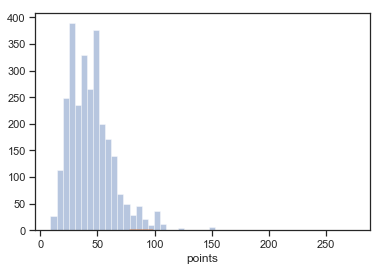

In [113]:
#continuous variable 'points' as histogram (1)
#Pro: gives good information about all the points of pinots in Oregon
#Con: doesn't compare to anything else
sbn.set(style="ticks")
sbn.distplot(or_pinot['price'], kde=False, bins=50)

sbn.distplot(or_pinot['points'])
plt.show()

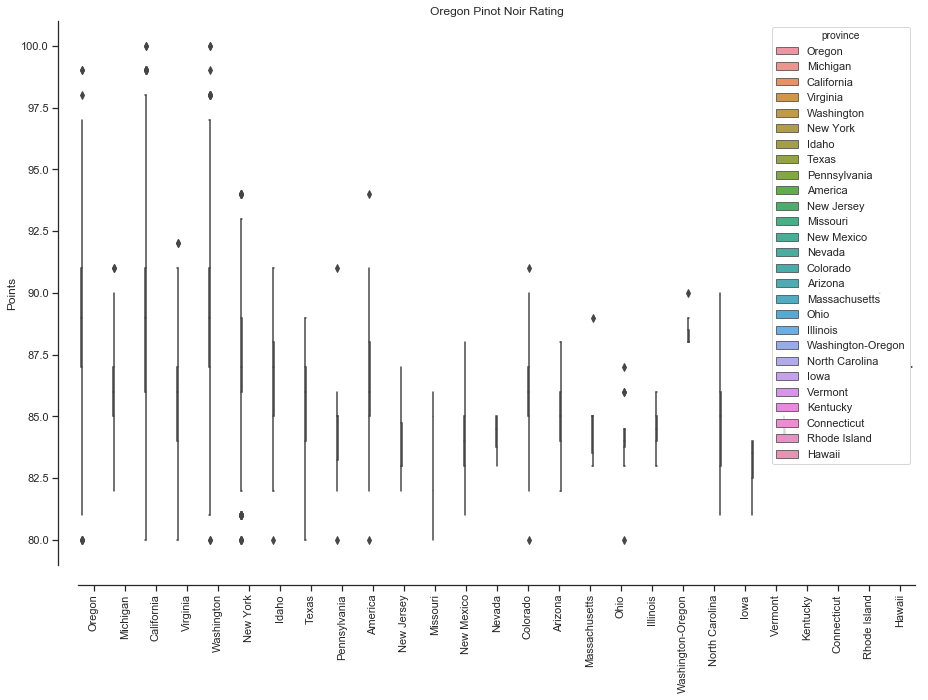

In [130]:
#continuous variable 'points' as boxplot (2)
#Pro: gives good info on how the distribution and descriptive statistics compare between states
#Con: a lot of different states make it hard to see the percentile breakouts
plt.figure(figsize=(15,10))
ax1 = sbn.boxplot(x="province", y="points", data=us_wine, hue="province")  
plt.title('Oregon Pinot Noir Rating')
sbn.despine(offset=20)
plt.setp(ax1.get_xticklabels(), rotation=90)
ax1.set(xlabel='', ylabel='Points')

plt.show()

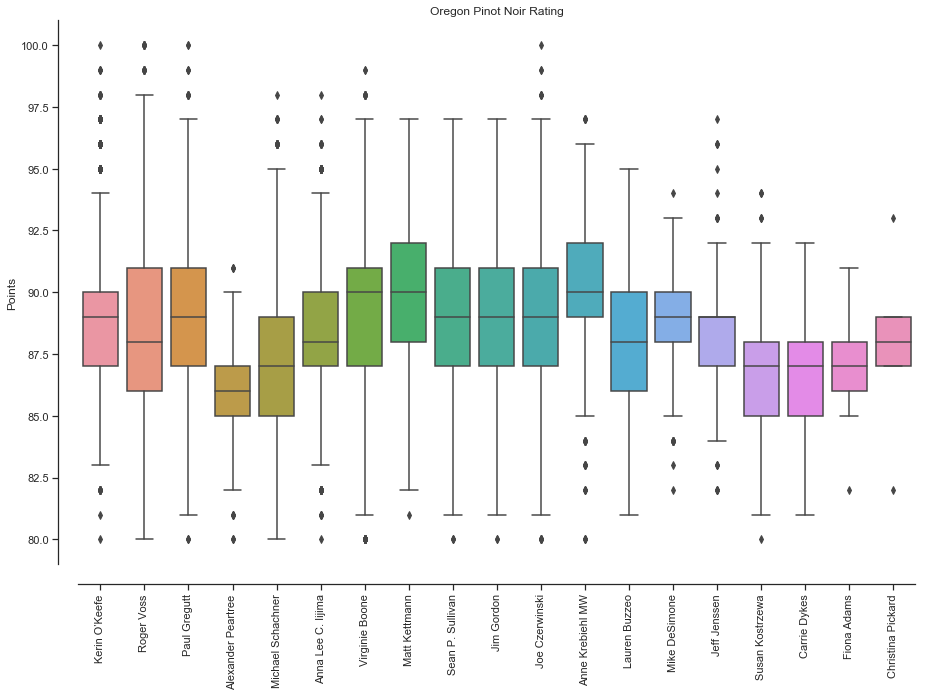

In [134]:
plt.figure(figsize=(15,10))
ax1 = sbn.boxplot(x="taster_name", y="points", data=wine)  
plt.title('Oregon Pinot Noir Rating')
sbn.despine(offset=20)
plt.setp(ax1.get_xticklabels(), rotation=90)
ax1.set(xlabel='', ylabel='Points')

plt.show()

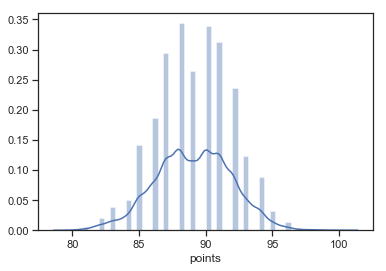

In [132]:
oregon_wine = wine[wine['province']=='Oregon']
or_pinot = oregon_wine[oregon_wine['variety']=='Pinot Noir']
cali_wine = wine[wine['province']=='California']
ca_pinot = cali_wine[cali_wine['variety']=='Pinot Noir']
us_wine = wine[wine['country']=='US']

paulg_taster = wine[wine['taster_name']=='Paul Gregutt']

sbn.set(style="ticks")
sbn.distplot(paulg_taster['points'], bins=50)
plt.show()

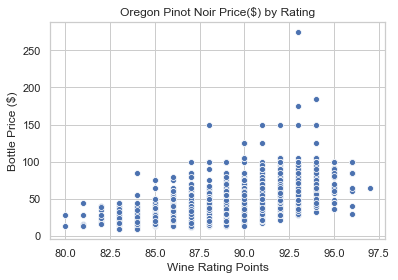

In [76]:
#continous variable 'points' as scatter plot (3)
#continuous variables 'points' and 'price' scattered (1)
#Pro: Good way to compare two continuous variables
#Con: Doesn't give any info on the statistics of each variable or how correlated they are

sbn.set(style='whitegrid')

sbn.scatterplot(x=or_pinot['points'], y=or_pinot['price'])
plt.xlabel('Wine Rating Points')
plt.ylabel('Bottle Price ($)')
plt.title('Oregon Pinot Noir Price($) by Rating')
plt.show()

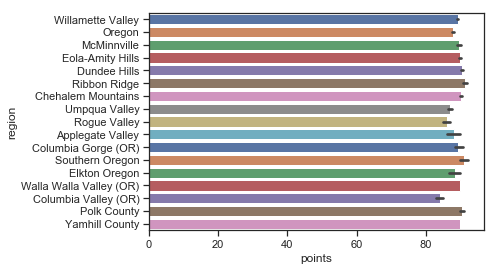

In [155]:
#continous variable 'points' as bar plot (4)
#Pro: Quick way to compare areas with a continuous variable
#Con: Not very informative and can be misleading

sbn.barplot(x='points', y='region_1', data=or_pinot, palette='deep')
plt.xlabel('points')
plt.ylabel('region')
plt.show()

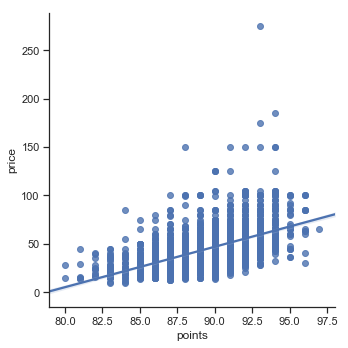

In [135]:
#continuous variables 'points' and 'price' linear regression (2)
#Pro: Gives information about their correlation (pos or neg)
#Con: regression includes outlier data in the fit

sbn.lmplot(x='points', y='price', data=or_pinot, palette='muted')
plt.show()

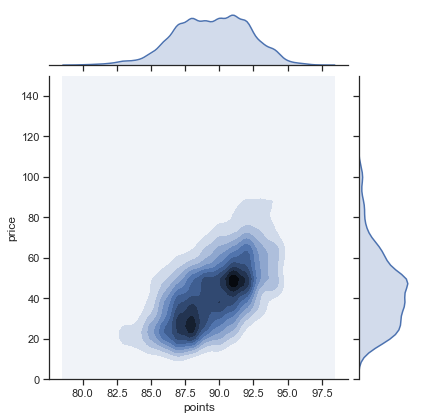

In [146]:
#continuous variables 'points' and 'price' joint plot (3)
#Pro: Shows the correlation of the two variables and their distributions
#Con: Hard to see actual data points and evaluate outliers

sbn.jointplot(or_pinot['points'], or_pinot['price'], kind='kde')
plt.ylim(0,150)
plt.show()

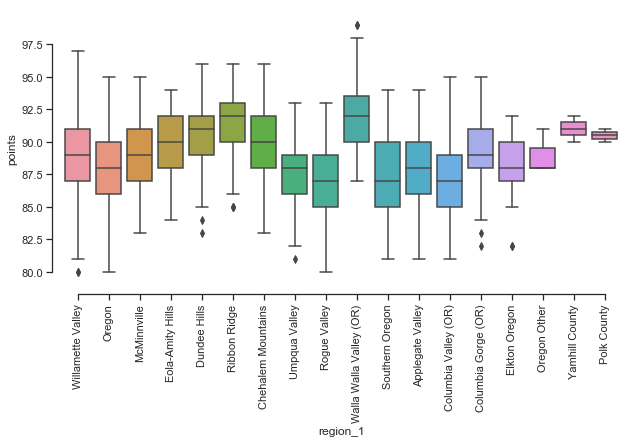

In [118]:
#categorical and continuous variable in boxes (1)
#Pro: Good way to quickly compare descriptive statistics between continuous and categorical variables
#Con: Hard to see discrete mean values and whether their differences are meaningful or not
plt.figure(figsize=(10,5))

sbn.set(style='ticks')

box = sbn.boxplot(x=oregon_wine['region_1'], y=oregon_wine['points'])
sbn.despine(offset=10, trim=True)
plt.setp(box.get_xticklabels(), rotation=90)
plt.show()

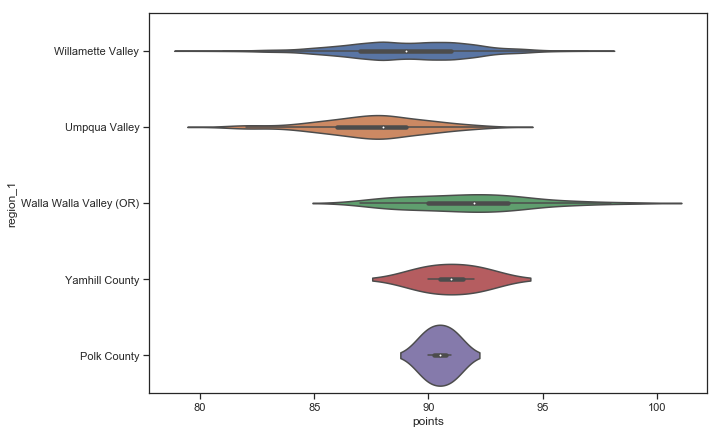

In [154]:
#categorical and continuous variable in violin plot (2)
#Pro: Similar to a barplot, but it better shows where the large clumps of data are located
#Con: Doesn't provide statistical descriptions
or_region_short = oregon_wine.loc[(oregon_wine['region_1']=='Willamette Valley') |
                                  (oregon_wine['region_1']=='Walla Walla Valley (OR)') |
                                  (oregon_wine['region_1']=='Umpqua Valley') |
                                  (oregon_wine['region_1']=='Polk County') |
                                  (oregon_wine['region_1']=='Yamhill County')]
plt.figure(figsize=(10,7))
sbn.violinplot(x='points', y='region_1', data=or_region_short, points='inner')
plt.show()

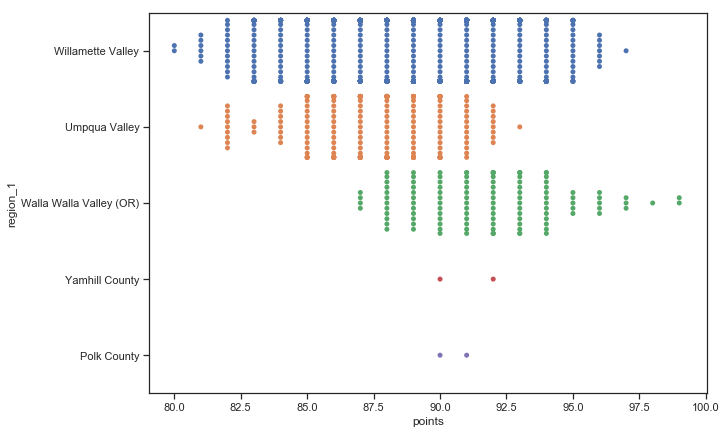

In [157]:
#categorical and continuous variable in swarm plot (3)
#Pro: Gives similar information about the data that the violin plot does, but with more detail
#Con: No descriptive statistics, and the points are in 0.5 increments that make it look very segmented

plt.figure(figsize=(10,7))
sbn.swarmplot(x='points', y='region_1', data=or_region_short)
plt.show()

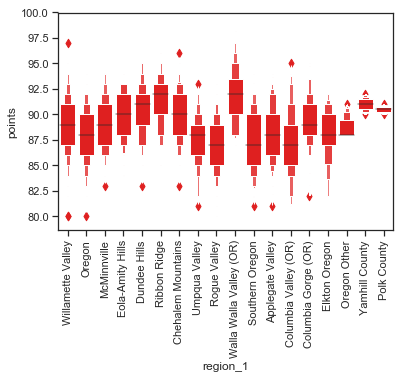

In [242]:
#categorical and continuous variable in boxen plot (4)
#Pro: same as violin or swarm plot but with mean info
#Con: not easy to see if differences in regions are significant or not
or_avg_points = oregon_wine.loc[:,['region_1', 'points']]
avg_points = or_avg_points.groupby('region_1').aggregate(np.mean)

ax1 = sbn.boxenplot(x='region_1', y='points', data=or_avg_points, color='red')
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.show()

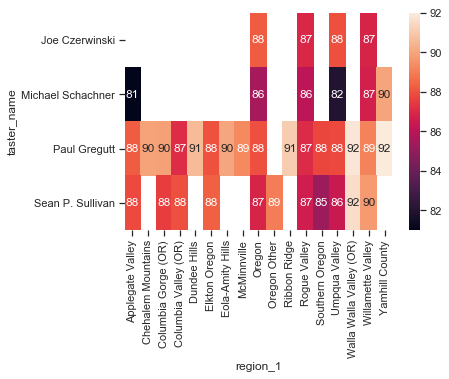

In [187]:
#categorical and continuous variable in heatmap (5)
#Pro: This would be a good way to view outliers of average points if each region had a review from every taster
#Con: We are missing data for reviewers from all of the regions

or_wine_short = oregon_wine.loc[:,['region_1', 'taster_name', 'points']]
us_wine_short = us_wine.loc[:,['province', 'taster_name', 'points']]

or_hmap_table = or_wine_short.pivot_table(values="points", columns="region_1", index="taster_name")
us_hmap_table = us_wine_short.pivot_table(values="points", columns="province", index="taster_name")

sbn.heatmap(or_hmap_table, annot=True)
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


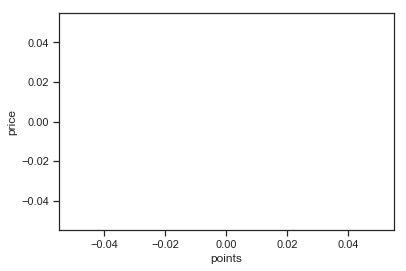

In [222]:
or_cab = oregon_wine.loc[oregon_wine['variety']=='Cabernet Sauvignon']
cali_cab = cali_wine.loc[cali_wine['variety']=='Cabernet Sauvignon']

sbn.set(style="ticks")

#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))

sbn.kdeplot(or_pinot['points'], or_pinot['price'], shade=True, shade_lowest=False)

sbn.kdeplot(ca_pinot['points'], ca_pinot['price'], shade=True, shade_lowest=False)
plt.show()

In [70]:
less = or_pinot.loc[or_pinot['price'] <= 25.0, :]
less

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
21,21,US,"A sleek mix of tart berry, stem and herb, alon...",NaN,87,20.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Acrobat 2013 Pinot Noir (Oregon),Pinot Noir,Acrobat
41,41,US,"A stiff, tannic wine, this slowly opens and br...",NaN,86,22.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Hawkins Cellars 2009 Pinot Noir (Willamette Va...,Pinot Noir,Hawkins Cellars
78,78,US,Some rosés are made simply by bleeding the jui...,Rosé of,86,25.0,Oregon,Eola-Amity Hills,Willamette Valley,Paul Gregutt,@paulgwine,Z'IVO 2015 Rosé of Pinot Noir (Eola-Amity Hills),Pinot Noir,Z'IVO
251,251,US,"Spicy and tannic, this inexpensive Pinot from ...",Papillon Estate,85,22.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Cherry Hill 2006 Papillon Estate Pinot Noir (W...,Pinot Noir,Cherry Hill
727,727,US,Light strawberry fruit carries an undertone of...,NaN,85,13.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Rascal 2014 Pinot Noir (Oregon),Pinot Noir,Rascal
915,915,US,"This is smooth and accessible, putting a light...",Atração,87,25.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Coelho 2014 Atração Pinot Noir (Willamette Val...,Pinot Noir,Coelho
1045,1045,US,Far and away the freshest and most interesting...,NaN,85,24.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Honeywood Winery 2006 Pinot Noir (Willamette V...,Pinot Noir,Honeywood Winery
1830,1830,US,The Blanc de Noir name would suggest it's a sp...,Blanc de Noir,84,15.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Cardwell Hill 2014 Blanc de Noir Pinot Noir (W...,Pinot Noir,Cardwell Hill
1996,1996,US,"Despite its single-vineyard designation, this ...",Guadalupe Vineyard,84,25.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Wildewood 2013 Guadalupe Vineyard Pinot Noir (...,Pinot Noir,Wildewood
2004,2004,US,Underripe fruit seems more sour than anything....,NaN,84,19.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Wine by Joe 2013 Pinot Noir (Oregon),Pinot Noir,Wine by Joe
